In [1]:
import MetaTrader5 as mt5

In [2]:
if mt5.initialize():
    print("MetaTrader5 initialized")
else:
    print("MetaTrader5 not initialized")

MetaTrader5 initialized


In [3]:
print(mt5.account_info())
print("\n")
print(mt5.terminal_info())

AccountInfo(login=31501023, trade_mode=0, leverage=500, limit_orders=50, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=9988.64, credit=0.0, profit=0.0, equity=9988.64, margin=0.0, margin_free=9988.64, margin_level=0.0, margin_so_call=100.0, margin_so_so=50.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Demo Derived', server='Deriv-Demo', currency='USD', company='Deriv.com Limited')


TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4330, maxbars=100000, codepage=0, ping_last=173934, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\omage\\AppData

In [4]:
total_market = mt5.symbols_total()
print(total_market)
markets = mt5.symbols_get("Volatility")
for market in markets:
    print(market.name)

291
Volatility 10 (1s) Index
Volatility 10 Index
Volatility 100 (1s) Index
Volatility 100 Index
Volatility 150 (1s) Index
Volatility 200 (1s) Index
Volatility 25 (1s) Index
Volatility 25 Index
Volatility 250 (1s) Index
Volatility 300 (1s) Index
Volatility 50 (1s) Index
Volatility 50 Index
Volatility 75 (1s) Index
Volatility 75 Index


In [5]:
rates = mt5.copy_rates_from_pos("Volatility 75 Index", mt5.TIMEFRAME_M30, 100, 99999)
print(rates)

[(1546318800, 110937.33, 111280.18, 110692.59, 111096.21, 840, 6000, 0)
 (1546320600, 111102.52, 112266.87, 111075.16, 111906.08, 900, 6000, 0)
 (1546322400, 111901.24, 112325.91, 111536.92, 111769.42, 900, 6000, 0)
 ...
 (1716483600, 157987.17, 159370.52, 157670.11, 157783.64, 900, 4279, 0)
 (1716485400, 157778.4 , 158617.49, 157341.7 , 157643.96, 900, 4279, 0)
 (1716487200, 157592.41, 158338.56, 157242.46, 157737.04, 900, 4279, 0)]


In [6]:
display(rates)

array([(1546318800, 110937.33, 111280.18, 110692.59, 111096.21, 840, 6000, 0),
       (1546320600, 111102.52, 112266.87, 111075.16, 111906.08, 900, 6000, 0),
       (1546322400, 111901.24, 112325.91, 111536.92, 111769.42, 900, 6000, 0),
       ...,
       (1716483600, 157987.17, 159370.52, 157670.11, 157783.64, 900, 4279, 0),
       (1716485400, 157778.4 , 158617.49, 157341.7 , 157643.96, 900, 4279, 0),
       (1716487200, 157592.41, 158338.56, 157242.46, 157737.04, 900, 4279, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [7]:
print(len(rates) - 1)

94530


In [8]:
x = []
y = []

i = 0
for rate in rates:
    if i == 0:
        i=1
    else:    
        x.append([rate[1],rate[2],rate[3],rate[4],rate[5]])
i = 0
for rate in rates:
    if i < len(rates) - 1:
        y.append(rate[4]) 
        i += 1
    else:
        print("done executing")   
    

done executing


In [9]:
import numpy as np

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
print(x.shape)
print(y.shape)

(94530, 5)
(94530,)


In [12]:
print(y)

[111096.21 111906.08 111769.42 ... 158070.9  157783.64 157643.96]


In [13]:
for i in range(3):
    x = np.concatenate([x,x])
    y = np.concatenate([y,y])

In [14]:
print(x.shape)
print(y.shape)

(756240, 5)
(756240,)


In [15]:
print(x)

[[111102.52 112266.87 111075.16 111906.08    900.  ]
 [111901.24 112325.91 111536.92 111769.42    900.  ]
 [111821.22 112389.49 111584.01 112294.98    900.  ]
 ...
 [157987.17 159370.52 157670.11 157783.64    900.  ]
 [157778.4  158617.49 157341.7  157643.96    900.  ]
 [157592.41 158338.56 157242.46 157737.04    900.  ]]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.001, random_state=40)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(755483, 5)
(757, 5)
(755483,)
(757,)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train,y_train)
y_train = sc_y.fit_transform(y_train.reshape((len(y_train),1)))

x_test = sc_x.transform(x_test)
y_test = sc_y.transform(y_test.reshape((len(y_test),1)))

print(x_train.shape)
print(y_train.shape)

(755483, 5)
(755483, 1)


In [21]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [22]:
print(y_train.shape)
print(y_test.shape)

(755483,)
(757,)


In [23]:
print(x_train)

[[-0.55158132 -0.54277966 -0.5453774  -0.53665054 -0.1464032 ]
 [-1.14592907 -1.14916722 -1.15533001 -1.15878837  0.03379003]
 [-0.48419156 -0.48418402 -0.48345973 -0.48243171  0.03379003]
 ...
 [-1.38171635 -1.37955479 -1.37961709 -1.37861431  0.03379003]
 [-0.22879601 -0.22443067 -0.22685865 -0.22385371  0.03379003]
 [-1.47558939 -1.47506693 -1.47353862 -1.47281782  0.03379003]]


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor = RandomForestRegressor(n_estimators=200, n_jobs = 8, random_state=40, verbose=2)

In [26]:
t_model = regressor.fit(x_train,y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.7s


building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75

[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   43.0s


building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   58.1s finished


In [27]:
print(t_model.score(x_test,y_test))

0.9999999999973004


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [28]:
print(x_test[-1])

[-0.25074461 -0.25835718 -0.2674044  -0.27335116  0.03379003]


In [29]:
y_pred = t_model.predict([x_test[-1]])
print(y_pred)
print(sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)))

[-0.25078196]
[[426089.93]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [30]:
print(y_test[-1])
print(sc_y.inverse_transform(y_test[-1].reshape(1,1)))
print(x_test[-1])

-0.25078195622829313
[[426089.93]]
[-0.25074461 -0.25835718 -0.2674044  -0.27335116  0.03379003]


In [31]:
import joblib

In [32]:
joblib.dump(t_model,"v75i t_model.joblib")
joblib.dump(sc_x,"v75i sc_x.joblib")
joblib.dump(sc_y,"v75i sc_y.joblib")

['v75i sc_y.joblib']

In [33]:
rates = mt5.copy_rates_from_pos("Volatility 75 Index", mt5.TIMEFRAME_H1, 0, 100)

In [34]:
x = []
y = []

i = 0
for rate in rates:
    if i == 0:
        i=1
    else:    
        x.append([rate[1],rate[2],rate[3],rate[4],rate[5]])
i = 0
for rate in rates:
    if i < len(rates) - 1:
        y.append(rate[4]) 
        i += 1
    else:
        print("done executing") 

done executing


In [35]:
x = np.array(x)
y = np.array(y)
x = sc_x.transform(x)
y = sc_y.transform(y.reshape((len(y),1)))

In [36]:
y = y.reshape(-1)

In [37]:
print(x)

[[-1.26955113 -1.26874799 -1.26913754 -1.26794182 81.12074276]
 [-1.26777197 -1.26342781 -1.26515048 -1.26170632 81.12074276]
 [-1.26150027 -1.25281862 -1.25900866 -1.25079747 81.12074276]
 [-1.2508055  -1.24813884 -1.2488168  -1.24879803 81.12074276]
 [-1.24898524 -1.25069061 -1.25153939 -1.24804414 81.12074276]
 [-1.2478574  -1.23966915 -1.24596902 -1.23978852 81.03064615]
 [-1.23979731 -1.23472631 -1.23652834 -1.23309173 81.12074276]
 [-1.2329652  -1.22978926 -1.23382739 -1.23547895 81.03064615]
 [-1.23548377 -1.2316897  -1.23319563 -1.23242294 81.12074276]
 [-1.23239874 -1.23405879 -1.23447709 -1.23319801 81.12074276]
 [-1.23308961 -1.21600927 -1.2307965  -1.2151889  80.94054954]
 [-1.21501087 -1.21702891 -1.21860775 -1.21865635 81.12074276]
 [-1.2187022  -1.2154603  -1.21723551 -1.21622242 81.12074276]
 [-1.21612855 -1.21394696 -1.21442309 -1.21134232 81.12074276]
 [-1.21136726 -1.20638252 -1.20890936 -1.21088547 81.12074276]
 [-1.21069928 -1.21336472 -1.2190589  -1.21735222 30.66

In [38]:
print(t_model.score(x,y))

0.9998724815448213


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [39]:
y_pred = t_model.predict(x)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [40]:
print(y_pred)

[-1.26953643 -1.26750894 -1.26152128 -1.2509207  -1.24902646 -1.24801862
 -1.23961462 -1.23300601 -1.23557433 -1.23252852 -1.23301527 -1.21526735
 -1.21879113 -1.21572649 -1.21141504 -1.2107708  -1.2166346  -1.21370616
 -1.21878876 -1.21368218 -1.21458588 -1.21982772 -1.22393327 -1.22998148
 -1.22303672 -1.22782112 -1.22995962 -1.22500685 -1.23732058 -1.23725498
 -1.2417842  -1.24235757 -1.23253121 -1.23858549 -1.23206504 -1.23301527
 -1.21731112 -1.21279637 -1.20830835 -1.20522672 -1.21057508 -1.20964331
 -1.20388301 -1.20899703 -1.20987271 -1.22164392 -1.22297543 -1.2145082
 -1.21281288 -1.20837163 -1.20516351 -1.20960364 -1.2126911  -1.21894112
 -1.22500685 -1.23115362 -1.22995642 -1.22635735 -1.22678204 -1.23173534
 -1.24222543 -1.2454687  -1.24220289 -1.24320537 -1.23079981 -1.23249481
 -1.22304565 -1.22017039 -1.22165635 -1.23083792 -1.23855882 -1.2402916
 -1.24682    -1.24614176 -1.25116039 -1.25428202 -1.25936762 -1.26194266
 -1.27016319 -1.26811194 -1.28128753 -1.27830751 -1.2

In [41]:
y = sc_y.inverse_transform(y.reshape((len(y),1)))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))

In [42]:
print(y)



[[175568.96]
 [175905.72]
 [177439.43]
 [180122.62]
 [180614.41]
 [180799.84]
 [182830.43]
 [184477.6 ]
 [183890.43]
 [184642.1 ]
 [184451.46]
 [188881.06]
 [188028.19]
 [188626.85]
 [189827.18]
 [189939.55]
 [188348.96]
 [189187.77]
 [187983.91]
 [189170.74]
 [189007.15]
 [187843.86]
 [186707.08]
 [185334.69]
 [186932.  ]
 [185705.12]
 [185273.77]
 [186545.26]
 [183312.86]
 [183363.99]
 [182355.21]
 [182205.58]
 [184694.71]
 [183115.63]
 [184715.51]
 [184465.83]
 [188294.02]
 [189462.95]
 [190566.9 ]
 [191250.49]
 [190073.34]
 [190245.77]
 [191629.42]
 [190391.57]
 [190181.13]
 [187299.15]
 [186935.35]
 [189137.1 ]
 [189400.22]
 [190611.47]
 [191225.69]
 [190233.25]
 [189512.74]
 [187916.43]
 [186521.93]
 [185066.74]
 [185316.97]
 [186121.38]
 [185865.12]
 [184796.71]
 [182209.78]
 [181441.51]
 [182270.8 ]
 [182013.29]
 [184956.06]
 [184527.2 ]
 [186912.07]
 [187612.78]
 [187310.26]
 [184959.8 ]
 [183126.87]
 [182768.31]
 [181074.45]
 [181216.88]
 [180072.  ]
 [179222.82]
 [178079.18]

In [43]:
print(y_pred)

[[175511.97   ]
 [176010.664  ]
 [177483.4184 ]
 [180090.79   ]
 [180556.70675]
 [180804.5997 ]
 [182871.68985]
 [184497.177  ]
 [183865.4594 ]
 [184614.62165]
 [184494.89875]
 [188860.2666 ]
 [187993.5396 ]
 [188747.33425]
 [189807.79965]
 [189966.2606 ]
 [188523.9708 ]
 [189244.26415]
 [187994.12295]
 [189250.16145]
 [189027.8837 ]
 [187738.57565]
 [186728.7541 ]
 [185241.10545]
 [186949.2737 ]
 [185772.47725]
 [185246.483  ]
 [186464.69   ]
 [183435.9428 ]
 [183452.0778 ]
 [182338.0487 ]
 [182197.0189 ]
 [184613.9609 ]
 [183124.81925]
 [184728.621  ]
 [184494.89875]
 [188357.5695 ]
 [189468.04145]
 [190571.93615]
 [191329.91   ]
 [190014.40045]
 [190243.58245]
 [191660.4152 ]
 [190402.5457 ]
 [190187.16005]
 [187291.8527 ]
 [186964.34855]
 [189046.98965]
 [189463.97975]
 [190556.3723 ]
 [191345.4569 ]
 [190253.34   ]
 [189493.934  ]
 [187956.6485 ]
 [186464.69   ]
 [184952.8    ]
 [185247.2696 ]
 [186132.5137 ]
 [186028.0564 ]
 [184809.71795]
 [182229.5229 ]
 [181431.79   ]
 [182235

In [44]:
import matplotlib.pyplot as plt

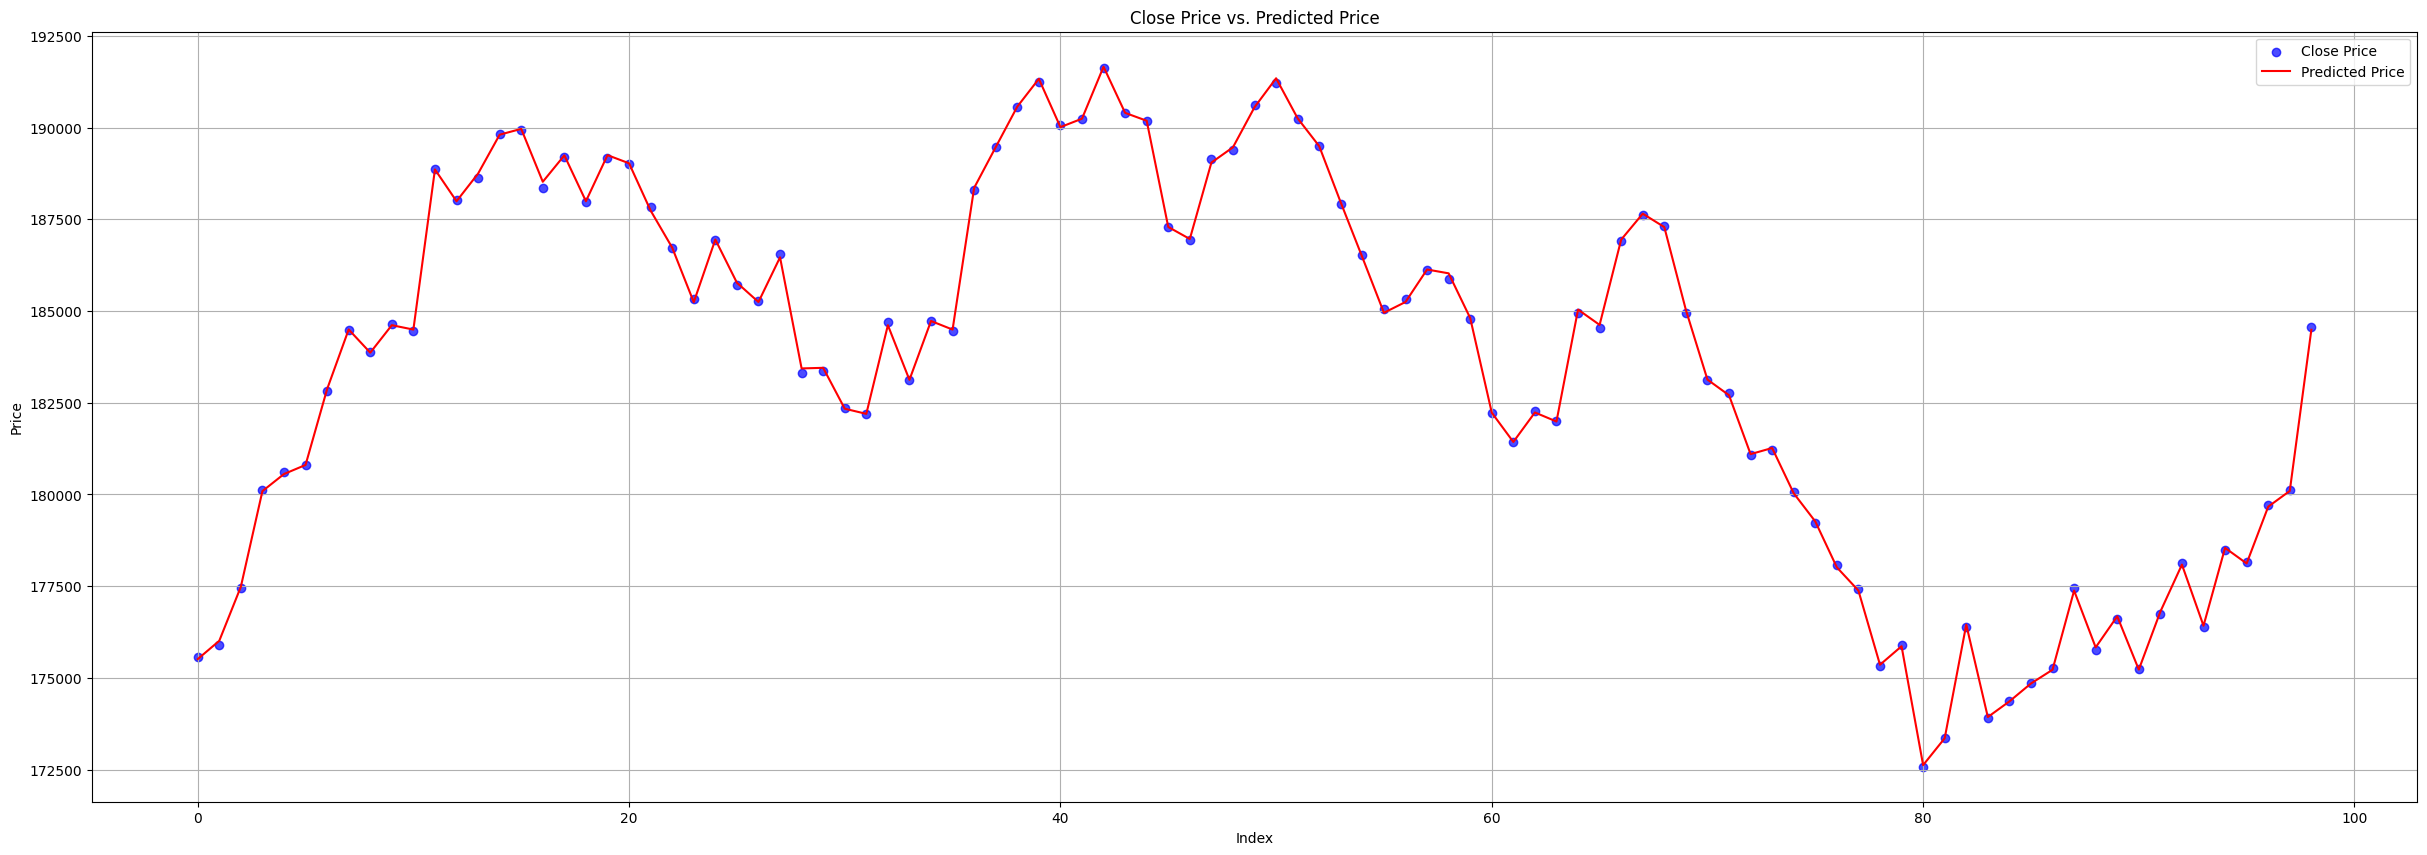

In [45]:
plt.figure(figsize=(30, 10))  # Adjust figure size as needed

# Plot close price as scatter chart
plt.scatter(range(len(y)), y, label='Close Price', color='blue', alpha=0.7)

# Plot predicted price as line graph
plt.plot(range(len(y_pred)), y_pred, label='Predicted Price', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Close Price vs. Predicted Price')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()